In [9]:
!pip install sklearn

In [10]:
import pandas as pd

In [11]:
import numpy as np

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

In [13]:
!pip install --upgrade tensorflow

In [14]:
# Loading data into different variables

X_train = pd.read_csv(r"/Users/Andrew/Documents/Python/Lab 2 - AI Example Files/input_train.csv")
X_train = np.array(X_train.iloc[:,0:9])
Y_train = pd.read_csv(r"/Users/Andrew/Documents/Python/Lab 2 - AI Example Files/output_train.csv")
Y_train = np.array(Y_train)

X_test = pd.read_csv(r"/Users/Andrew/Documents/Python/Lab 2 - AI Example Files/input_test.csv")
X_test = np.array(X_test.iloc[:,0:9])
Y_test = pd.read_csv(r"/Users/Andrew/Documents/Python/Lab 2 - AI Example Files/output_test.csv")
Y_test = np.array(Y_test)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3226, 9) (3226, 3)
(846, 9) (846, 3)


In [35]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(min_samples_split=25,random_state = 5)
regressor.fit(X_train, Y_train)

#Changed min_samples_split to from 50 to 25, and changed random_state from 2 to 5

Predict = regressor.predict(X_train)

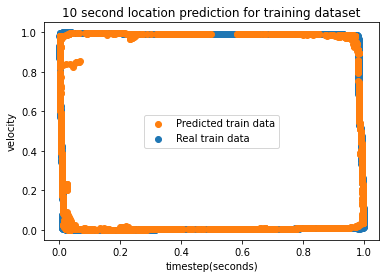

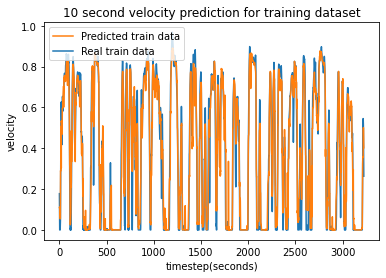

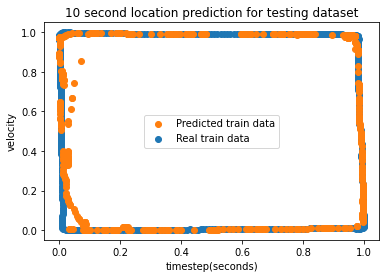

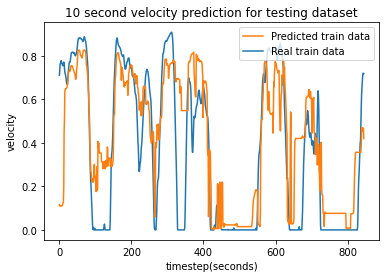

In [36]:
plt.figure(3)
Test1 = plt.scatter(Y_train[:,1], Y_train[:,2])
Predict1 = plt.scatter(Predict[:,1], Predict[:,2])
plt.legend([Predict1,Test1], ["Predicted train data", "Real train data"])
plt.title("10 second location prediction for training dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

plt.figure(4)
Test2, =  plt.plot(Y_train[:,0])
Predict2, = plt.plot(Predict[:,0])
plt.legend([Predict2,Test2], ["Predicted train data", "Real train data"])
plt.title("10 second velocity prediction for training dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

Predict_test = regressor.predict(X_test)

plt.figure(5)
Test3 = plt.scatter(Y_test[:,1], Y_test[:,2])
Predict3 = plt.scatter(Predict_test[:,1], Predict_test[:,2])
plt.legend([Predict3,Test3], ["Predicted train data", "Real train data"])
plt.title("10 second location prediction for testing dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

plt.figure(6)
Test4, =  plt.plot(Y_test[:,0])
Predict4, = plt.plot(Predict_test[:,0])
plt.legend([Predict4,Test4], ["Predicted train data", "Real train data"])
plt.title("10 second velocity prediction for testing dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

In [37]:
#Random Forest Calculation of the loss (prediction error)

from sklearn.metrics import mean_squared_error
MSE1 = mean_squared_error(Y_test[:,0], Predict_test[:,0])
print(MSE1,'Mean Squared Error 10 second')

0.046051543076152515 Mean Squared Error 10 second


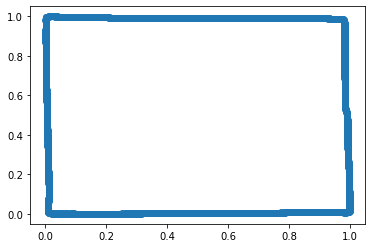

In [18]:
#LSTM

plt.figure(1)
Map_Plot = plt.scatter(X_train[:,7], X_train[:,8])

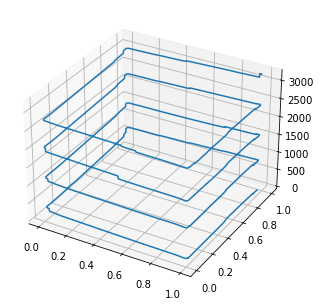

In [19]:
fig = plt.figure(2)
steps = list(range(0,3226))
ax = Axes3D(fig)
ax.plot3D(X_train[:,7], X_train[:,8], steps)

In [20]:
X_train_3D = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
print(X_train.shape)

(3226, 9)


In [27]:
# Prepare LSTM Algorithm

model = tf.keras.Sequential()
model.add(LSTM(64, activation= 'tanh' , input_shape = (1,9)))

model.add(Dense(3))
model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['mae','acc'])
model.fit( X_train_3D,Y_train,epochs = 10 ,batch_size = 25, verbose =5)
Predict = model.predict(X_train_3D, verbose = 2)

#Changed batch_size from 50 to 25, and changed verbose from 2 to 5


Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
101/101 - 0s


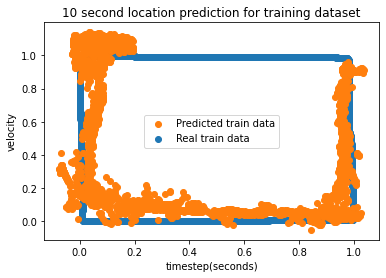

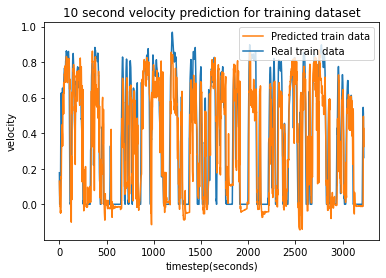

(846, 9)
27/27 - 0s


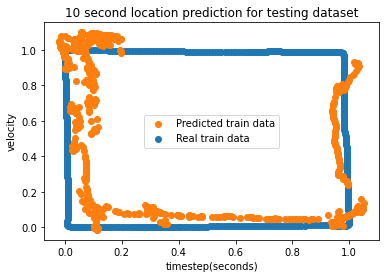

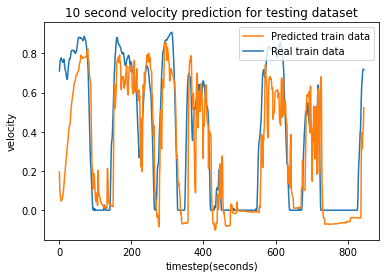

In [28]:
# Plot predictions
plt.figure(3)
Test1 = plt.scatter(Y_train[:,1], Y_train[:,2])
Predict1 = plt.scatter(Predict[:,1], Predict[:,2])
plt.legend([Predict1,Test1], ["Predicted train data", "Real train data"])
plt.title("10 second location prediction for training dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

plt.figure(4)
Test2,=  plt.plot(Y_train[:,0])
Predict2, = plt.plot(Predict[:,0])
plt.legend([Predict2,Test2], ["Predicted train data", "Real train data"])
plt.title("10 second velocity prediction for training dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

# Testing
X_test_3D = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
print(X_test.shape)
Predict_test = model.predict(X_test_3D, verbose = 2)

plt.figure(5)
Test3 = plt.scatter(Y_test[:,1], Y_test[:,2])
Predict3 = plt.scatter(Predict_test[:,1], Predict_test[:,2])
plt.legend([Predict3,Test3], ["Predicted train data", "Real train data"])
plt.title("10 second location prediction for testing dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

plt.figure(6)
Test4, =  plt.plot(Y_test[:,0])
Predict4, = plt.plot(Predict_test[:,0])
plt.legend([Predict4,Test4], ["Predicted train data", "Real train data"])
plt.title("10 second velocity prediction for testing dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

In [29]:
#LSTM Calculation of the loss (prediction error)

MSE1 = mean_squared_error(Y_test[:,0], Predict_test[:,0])
print(MSE1,'Mean Squared Error 10 second')

0.0393178423035155 Mean Squared Error 10 second


In [30]:
#Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(min_samples_split=25,random_state = 5)
regressor.fit(X_train, Y_train)

#Changed min_samples_split to from 50 to 25, and changed random_state from 2 to 5

Predict = regressor.predict(X_train)

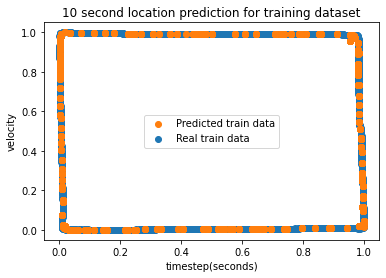

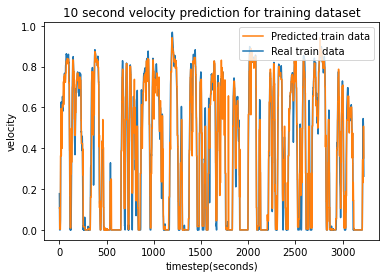

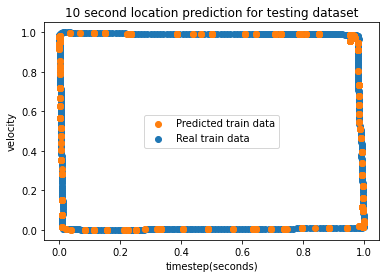

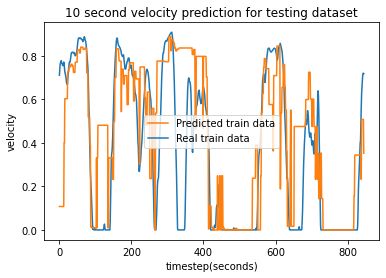

In [31]:
# Plot predictions

plt.figure(3)
Test1 = plt.scatter(Y_train[:,1], Y_train[:,2])
Predict1 = plt.scatter(Predict[:,1], Predict[:,2])
plt.legend([Predict1,Test1], ["Predicted train data", "Real train data"])
plt.title("10 second location prediction for training dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

plt.figure(4)
Test2, =  plt.plot(Y_train[:,0])
Predict2, = plt.plot(Predict[:,0])
plt.legend([Predict2,Test2], ["Predicted train data", "Real train data"])
plt.title("10 second velocity prediction for training dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

Predict_test = regressor.predict(X_test)

plt.figure(5)
Test3 = plt.scatter(Y_test[:,1], Y_test[:,2])
Predict3 = plt.scatter(Predict_test[:,1], Predict_test[:,2])
plt.legend([Predict3,Test3], ["Predicted train data", "Real train data"])
plt.title("10 second location prediction for testing dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

plt.figure(6)
Test4, =  plt.plot(Y_test[:,0])
Predict4, = plt.plot(Predict_test[:,0])
plt.legend([Predict4,Test4], ["Predicted train data", "Real train data"])
plt.title("10 second velocity prediction for testing dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

In [32]:
#Decision Tree Calculation of the loss (prediction error)

from sklearn.metrics import mean_squared_error
MSE1 = mean_squared_error(Y_test[:,0], Predict_test[:,0])
print(MSE1,'Mean Squared Error 10 second')

0.06970815525490992 Mean Squared Error 10 second
